TRIBOTEC AI — SEMANA 1
ERRO: [Errno 2] No such file or directory: '../data/cronograma.csv'

ICMS MÉDIO POR UF:
uf
MG    6091.38
RJ    7896.65
SP    6761.82
Name: icms, dtype: float64
GRÁFICO SALVO EM: ../notebooks/grafico_icms.png


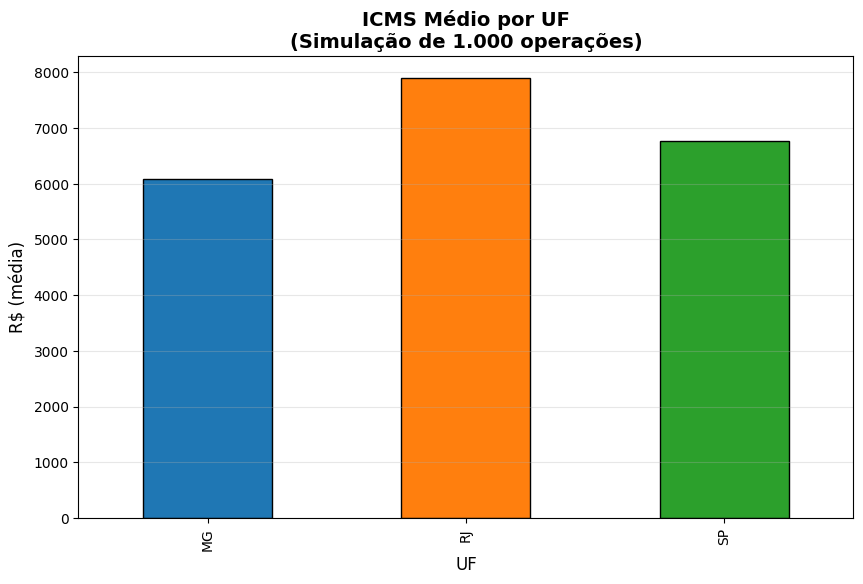

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("TRIBOTEC AI — SEMANA 1")

# CRONOGRAMA
try:
    cronograma = pd.read_csv('../data/cronograma.csv')
    display(cronograma)
except Exception as e:
    print("ERRO:", e)

# ICMS
def icms(v, uf='SP'):
    aliquotas = {'SP':0.18, 'RJ':0.20, 'MG':0.18}
    return round(v * aliquotas.get(uf.upper(), 0.18), 2)

# SIMULAÇÃO
np.random.seed(42)
df = pd.DataFrame({
    'valor': np.random.lognormal(10, 1, 1000),
    'uf': np.random.choice(['SP','RJ','MG'], 1000)
})
df['icms'] = df.apply(lambda x: icms(x['valor'], x['uf']), axis=1)

print("\nICMS MÉDIO POR UF:")
print(df.groupby('uf')['icms'].mean().round(2))

# === GRÁFICO COM SALVAMENTO AUTOMÁTICO ===
plt.figure(figsize=(10, 6))
df.groupby('uf')['icms'].mean().plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='black'
)
plt.title('ICMS Médio por UF\n(Simulação de 1.000 operações)', fontsize=14, fontweight='bold')
plt.ylabel('R$ (média)', fontsize=12)
plt.xlabel('UF', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# SALVA COMO IMAGEM
caminho_imagem = '../notebooks/grafico_icms.png'
plt.savefig(caminho_imagem, dpi=300, bbox_inches='tight', facecolor='white')
print(f"GRÁFICO SALVO EM: {caminho_imagem}")

plt.show()
